In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics

In [3]:
PATH = "data/houses/"

In [9]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory= True)
df_test = pd.read_csv(f'{PATH}test.csv', low_memory=True)

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [12]:
train_cats(df_raw)
apply_cats(df_test, df_raw)

In [13]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [14]:
os.makedirs(f'{PATH}tmp', exist_ok=True)
df_raw.to_feather(f'{PATH}tmp/bulldozers-raw')

In [15]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [16]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9747721663602669

In [17]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 292  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1168, 83), (1168,), (292, 83))

In [18]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [22]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05985735243650895, 0.15235188579838319, 0.9777531146101175, 0.8482555022412384, 0.8475528062044286]


In [23]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.05578937392735213, 0.152258085212781, 0.9806742131245396, 0.8484422979732498, 0.8636932201643924]


In [25]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.07483307034910464, 0.15428414746912628, 0.9652286670863935, 0.8443819768132261, 0.8662185370754663]


In [26]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=5)
m.fit(X_train, y_train)
print_score(m)

[0.09185351107383248, 0.15282314289668195, 0.9476127340188507, 0.8473152937199844, 0.8627769557103456]


In [28]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=10, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.11945781813604321, 0.15328991608592826, 0.9113939519710277, 0.846381168614738, 0.8515746277407159]


In [31]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True, min_samples_leaf=10, max_features=np.log(2))
m.fit(X_train, y_train)
print_score(m)

[0.11804658963548319, 0.15607311788731457, 0.9134751012026695, 0.8407521796252413, 0.8586234886006139]


In [32]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.07458140282097722, 0.15185166831787575, 0.9654621494395415, 0.8492503129055816, 0.8674255176498811]


In [34]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
17,OverallQual,0.565831
46,GrLivArea,0.119305
38,TotalBsmtSF,0.054166
61,GarageCars,0.032788
34,BsmtFinSF1,0.024330
62,GarageArea,0.023006
43,1stFlrSF,0.022502
19,YearBuilt,0.017080
20,YearRemodAdd,0.012627
4,LotArea,0.010772


In [35]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

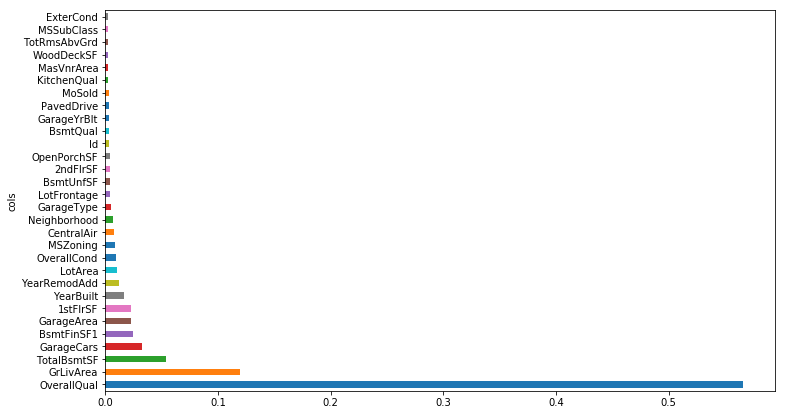

In [36]:
plot_fi(fi[:30]);

In [37]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

15

In [38]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [39]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.08080415057951928, 0.14784019106620203, 0.9594583379689657, 0.85710984268909, 0.8605780101870915]


In [1]:
fi = rf_feat_importance(m, df); fi[:10]
plot_fi(fi[:30]);

NameError: name 'rf_feat_importance' is not defined